In [1]:

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
sns.set_theme()
# sns.set({'axes.grid': True}, style="ticks")
sns.set_style('ticks', {'axes.grid':'True'})
sns.set_context("paper")

In [ ]:
labelPath = r"X:/IDEaS/MATBII/Data/New_Labels_2"

subjectsNumber = os.listdir(labelPath) # its with file extension

cnt = 1 
for subject in subjectsNumber:
    subjectLabel = os.path.join(labelPath, subject)
    dfLabel = pd.read_csv(subjectLabel)
    print(subject)
    # dfLabelCombine = pd.DataFrame(columns=['exp', 'complexity'])
    dfLabelCombine = pd.DataFrame(np.concatenate([dfLabel[['exp_0', 'com_exp_0']].values,
                                dfLabel[['exp_1', 'com_exp_1']].values,
                                dfLabel[['exp_2', 'com_exp_2']].values,
                                dfLabel[['exp_3', 'com_exp_3']].values], axis=0), columns=['exp', 'complexity'])



    defaultSeries = pd.Series({1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0, 7.0: 0, 8.0: 0, 9.0: 0}, name='exp')

    dfValues = dfLabelCombine['exp'].value_counts()

    defaultSeries.update(dfValues)

    fig, ax1 = plt.subplots(figsize=(6, 5))
    sns.barplot(x=defaultSeries.index, y=defaultSeries, color='b', ax=ax1)

    ax1.set(ylim=(0, 100))
    # ax1.legend_.set_title(None)
    ax1.set_xlabel(f'Cognitive Load Score', fontsize=15)
    ax1.set_ylabel('Counts', fontsize=15)
    # ax1.set_title('Type II', fontsize=15)
    sns.despine()
    plt.tight_layout()
    savePath = r'B:\Ideas\barplots'

    plt.savefig(os.path.join(savePath, f'Subject{cnt}.pdf'), dpi = 300)
    plt.savefig(os.path.join(savePath, f'Subject{cnt}.svg'))

    plt.show()

    cnt += 1

In [59]:
# Correlation between Complexity and Labels

labelPath = r"X:/IDEaS/MATBII/Data/New_Labels_2"

subjectsNumber = os.listdir(labelPath) # its with file extension
dfAllSubjects = pd.DataFrame()

cnt = 1 
for subject in subjectsNumber:
    subjectLabel = os.path.join(labelPath, subject)
    dfLabel = pd.read_csv(subjectLabel)
    print(subject)
    # dfLabelCombine = pd.DataFrame(columns=['exp', 'complexity'])
    dfLabelCombine = pd.DataFrame(np.concatenate([dfLabel[['exp_0', 'com_exp_0']].values,
                                dfLabel[['exp_1', 'com_exp_1']].values,
                                dfLabel[['exp_2', 'com_exp_2']].values,
                                dfLabel[['exp_3', 'com_exp_3']].values], axis=0), columns=['exp', 'complexity'])

    dfAllSubjects = pd.concat([dfAllSubjects, dfLabelCombine])

    # defaultSeries = pd.Series({1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0, 7.0: 0, 8.0: 0, 9.0: 0}, name='exp')

    # dfValues = dfLabelCombine['exp'].value_counts()

    # defaultSeries.update(dfValues)

    # fig, ax1 = plt.subplots(figsize=(6, 5))
    # sns.barplot(x=defaultSeries.index, y=defaultSeries, color='b', ax=ax1)

    # ax1.set(ylim=(0, 100))
    # # ax1.legend_.set_title(None)
    # ax1.set_xlabel(f'Cognitive Load Score', fontsize=15)
    # ax1.set_ylabel('Counts', fontsize=15)
    # # ax1.set_title('Type II', fontsize=15)
    # sns.despine()
    # plt.tight_layout()
    # savePath = r'B:\Ideas\barplots'

    # plt.savefig(os.path.join(savePath, f'Subject{cnt}.pdf'), dpi = 300)
    # plt.savefig(os.path.join(savePath, f'Subject{cnt}.svg'))

    # plt.show()

    cnt += 1

1026.csv
1105.csv
1106.csv
1175.csv
1194.csv
1337.csv
1390.csv
1400.csv
1419.csv
1517.csv
1544.csv
1624.csv
1629.csv
1674.csv
1688.csv
1717.csv
1765.csv
1818.csv
1892.csv
1929.csv
1933.csv
1936.csv
1953.csv
1981.csv


In [64]:
dfAllSubjects.T

,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
exp,5.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,7.0,...,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
complexity,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,...,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0


<AxesSubplot:>

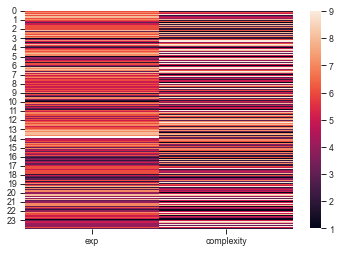

In [62]:
sns.heatmap(dfAllSubjects)

In [75]:
dfAllSubjects.loc[dfAllSubjects['complexity'] == 1]

,0,1,2,3,4,5,84,85,86,87,...,140,141,142,143,162,163,164,165,166,167
exp,5.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,...,4.0,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,3.0
complexity,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [127]:
df = pd.pivot_table(dfAllSubjects, index='exp', values='complexity', aggfunc=len, columns='complexity', fill_value=0)

In [128]:
df

complexity,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
exp,,,,,,,,,
1.0,35,8,9,6,13,0,2,3,0
2.0,110,72,42,23,38,22,13,17,6
3.0,102,76,71,40,69,30,26,26,32
4.0,132,113,87,89,94,63,54,49,30
5.0,111,128,129,129,117,106,94,113,62
6.0,47,99,115,154,129,159,149,166,132
7.0,16,45,72,80,77,116,133,107,162
8.0,12,27,40,43,33,61,83,76,110
9.0,5,2,5,6,0,13,16,13,36


In [111]:
df1 = df.sort_index(ascending=False)
df1

complexity,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
exp,,,,,,,,,
9.0,5,2,5,6,0,13,16,13,36
8.0,12,27,40,43,33,61,83,76,110
7.0,16,45,72,80,77,116,133,107,162
6.0,47,99,115,154,129,159,149,166,132
5.0,111,128,129,129,117,106,94,113,62
4.0,132,113,87,89,94,63,54,49,30
3.0,102,76,71,40,69,30,26,26,32
2.0,110,72,42,23,38,22,13,17,6
1.0,35,8,9,6,13,0,2,3,0


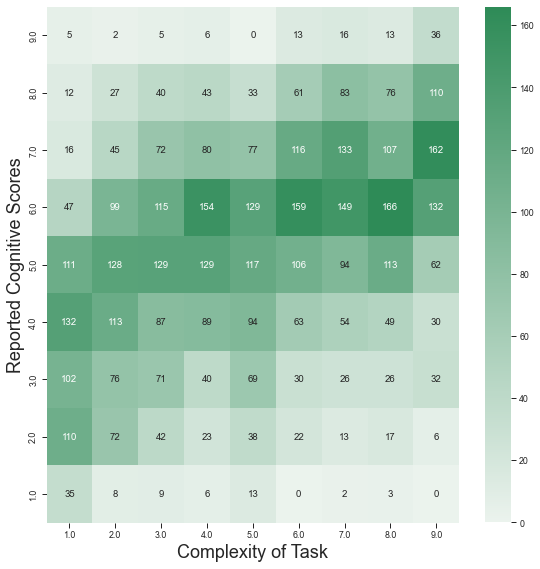

In [138]:
fig, ax = plt.subplots(figsize=(8, 8))
ax = sns.heatmap(df1, cmap=sns.light_palette("seagreen", as_cmap=True), annot=True, fmt="d")
ax.set_xlabel('Complexity of Task', fontsize=18)
ax.set_ylabel('Reported Cognitive Scores', fontsize=18)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)
plt.tight_layout()
savePath = r'B:\Ideas\heatmap'

plt.savefig(os.path.join(savePath, f'Com_v_Lab.pdf'), dpi = 300)
plt.savefig(os.path.join(savePath, f'Com_v_Lab.svg'))
plt.show()


In [117]:
ax = sns.heatmap(df1, square=True, cmap=sns.color_palette("CMRma"))


ValueError: CMRma is not a valid palette name

In [80]:
groupSeries

1.0    0
2.0    0
3.0    0
4.0    0
5.0    0
6.0    0
7.0    0
8.0    0
9.0    0
dtype: int64